In [7]:
import numpy as np
import pandas as pd
import scipy as sp

from utils import prony
from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy.linalg

from scipy import fft


default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*1.5



In [8]:
N = 128
# Time vector
t = np.linspace(0, 1, N, endpoint=True)

# Amplitudes and freqs
f1, f2, f3 = 2, 7, 12
A1, A2, A3 = 5, 1, 3

# Signal
x = A1 * np.cos(2*np.pi*f1*t) + A2 * np.cos(2*np.pi*f2*t) + A3 * np.cos(2*np.pi*f3*t)

/home/aser/Documents/labs/s7/big_data/laba5/utils.py:15: LinAlgWarning: Ill-conditioned matrix (rcond=3.76341e-18): result may not be accurate.
  a = scipy.linalg.solve([shift_x[p+i:i:-1] for i in range(p)], -x[p::])


<StemContainer object of 3 artists>

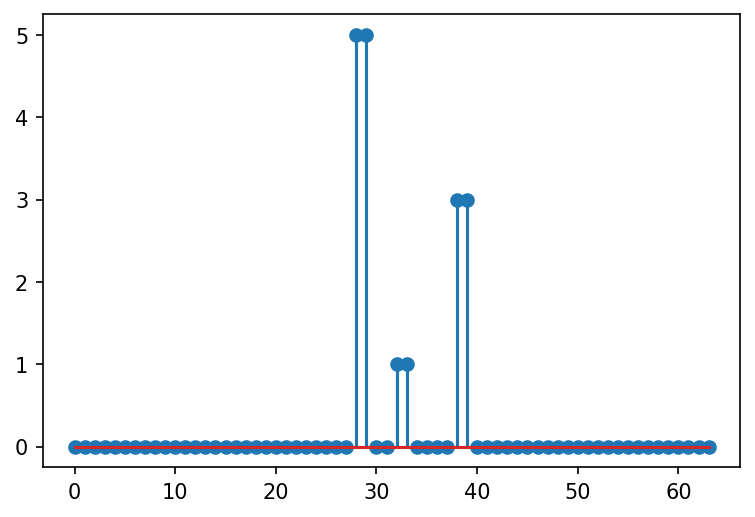

In [9]:
f, alfa, A, fi = prony(x, 0.1)
plt.stem(2 * A)

/home/aser/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


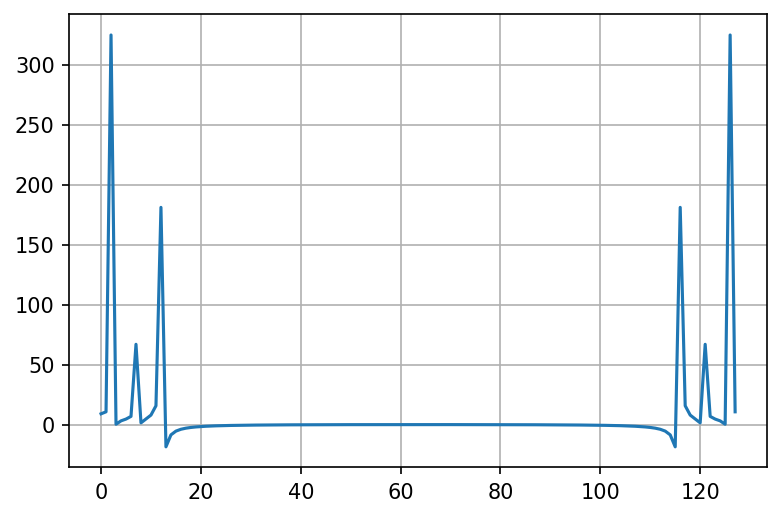

In [12]:
xf = fft.fft(x)
plt.grid()
plt.plot(xf)

In [4]:
# temperature

In [5]:
tdata = pd.read_csv(r"data/URWW.01.01.2016.01.01.2021.1.0.0.en.unic.00000000.csv", sep=";", encoding="utf-16", comment="#", error_bad_lines=False)
tdata = pd.DataFrame({"datetime": tdata["Local time in Volgograd (airport)"], "T": tdata["T"]}).dropna()
print(tdata)

b'Skipping line 56081: expected 14 fields, saw 16\nSkipping line 63628: expected 14 fields, saw 16\n'


               datetime     T
0      01.01.2021 23:30  -2.0
1      01.01.2021 23:00  -3.0
2      01.01.2021 22:30  -3.0
3      01.01.2021 22:00  -3.0
4      01.01.2021 21:30  -3.0
...                 ...   ...
80993  01.01.2016 02:30 -13.0
80994  01.01.2016 02:00 -13.0
80995  01.01.2016 01:30 -12.0
80996  01.01.2016 01:00 -12.0
80997  01.01.2016 00:00 -12.0

[80994 rows x 2 columns]


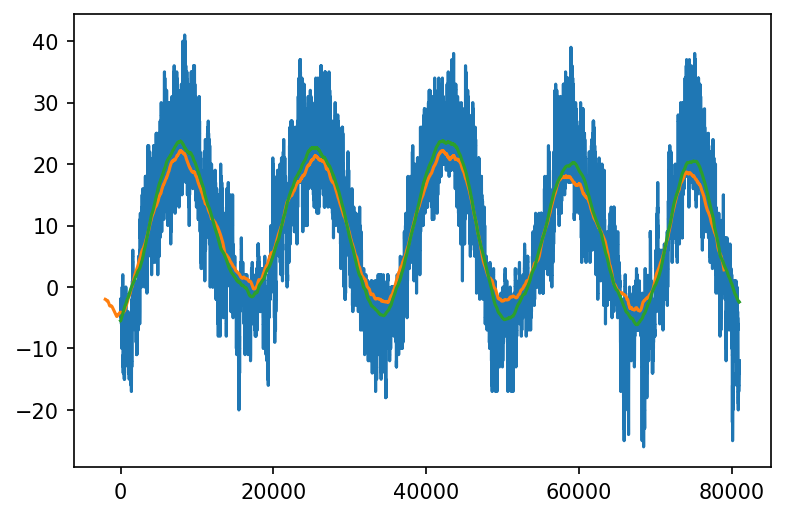

In [93]:
# data prepros
shift = 2000
plt.plot(tdata["T"])
plt.plot(np.array(range(-shift, len(tdata["T"]) + -shift)), tdata["T"].ewm(span=5000, adjust=False).mean())
plt.plot(tdata["T"].rolling(window=5000, center=True, min_periods=1).mean())